# Life Expectancy vs Crime Rate
---
Is there a clear correlation between Life Expectancy and Crime Rate? Intuitively this seems true but is there any data confirming this statement? Let's find out!

## Life Expectancy

First, we will load population indicators data (which includes life expectancy) from the United Nations Statistics Division (__http://data.un.org/_Docs/SYB/CSV/SYB60_T03_Population%20Growth,%20Fertility%20and%20Mortality%20Indicators.csv__) into a pandas dataframe.

In [14]:
import pandas as pd
import os

filename = os.path.join('Data', 'SYB60_T03_Population Growth_Fertility_and_Mortality_Indicators.csv')
population_indicators_df = pd.read_csv(filename, encoding='ISO-8859-1', skiprows=1, thousands=',')
population_indicators_df
population_indicators_df.rename(columns={'Region/Country/Area': 'Region/Country/Area ID',
                                         'Unnamed: 1': 'Region/Country/Area'}, inplace=True)

population_indicators_df = population_indicators_df[564:]  # remove data per region and just keep data per country
population_indicators_df.rename(columns={'Region/Country/Area ID': 'Country ID',
                                         'Region/Country/Area': 'Country'}, inplace=True)
population_indicators_df.head()

,Country ID,Country,Year,Series,Value,Footnotes,Source
564,4,Afghanistan,2005,Population annual rate of increase (percent),4.4,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
565,4,Afghanistan,2005,Total fertility rate (children per women),7.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
566,4,Afghanistan,2005,"Infant mortality for both sexes (per 1,000 liv...",89.5,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
567,4,Afghanistan,2005,"Maternal mortality ratio (deaths per 100,000 p...",821.0,NaN,"World Health Organization (WHO), the United Na..."
568,4,Afghanistan,2005,Life expectancy at birth for both sexes (years),56.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


## Crime Rate

As a second step, we will load Crime Rate data obtained from the United Nations Statistics Division (__http://data.un.org/_Docs/SYB/CSV/SYB62_T12_201904_Intentional%20homicides%20and%20Other%20Crimes.csv__) into a pandas dataframe.

In [15]:
import pandas as pd
import os

filename = os.path.join('Data', 'SYB62_T12_201904_Intentional homicides and Other Crimes.csv')
crime_df = pd.read_csv(filename, encoding='ISO-8859-1', skiprows=1, thousands=',')
crime_df.rename(columns={'Region/Country/Area': 'Region/Country/Area ID',
                         'Unnamed: 1': 'Region/Country/Area'}, inplace=True)
crime_df = crime_df[6:]            # remove data per region and just keep data per country
crime_df.rename(columns={'Region/Country/Area ID': 'Country ID',
                         'Region/Country/Area': 'Country'}, inplace=True)
crime_df.head()

,Country ID,Country,Year,Series,Value,Footnotes,Source
6,4,Afghanistan,2010,"Intentional homicide rates per 100,000",3.4,NaN,United Nations Office on Drugs and Crime (UNOD...
7,4,Afghanistan,2012,"Intentional homicide rates per 100,000",6.3,NaN,United Nations Office on Drugs and Crime (UNOD...
8,4,Afghanistan,2012,Percentage of male and female intentional homi...,11.8,Estimate.,United Nations Office on Drugs and Crime (UNOD...
9,4,Afghanistan,2012,Percentage of male and female intentional homi...,0.6,Estimate.,United Nations Office on Drugs and Crime (UNOD...
10,8,Albania,2005,"Intentional homicide rates per 100,000",5.0,NaN,United Nations Office on Drugs and Crime (UNOD...


In [16]:
# after inspecting the data above, it seems that intentional homicide rates per 100,000 is measured
# in most of the countries... we will use that first

crime_df_2010 = crime_df[crime_df['Year']==2010]
crime_df_2010.pivot(index='Country', columns='Series', values='Value')#.dropna(axis='index')

Series,"Assault rate per 100,000 population","Intentional homicide rates per 100,000","Kidnapping at the national level, rate per 100,000","Percentage of male and female intentional homicide victims, Female","Percentage of male and female intentional homicide victims, Male","Robbery at the national level, rate per 100,000 population","Theft at the national level, rate per 100,000 population","Total Sexual Violence at the national level, rate per 100,000"
Country,,,,,,,,
Afghanistan,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN
Albania,6.1,4.3,0.3,1.3,7.3,8.0,135.3,2.7
Algeria,114.6,0.7,0.5,NaN,NaN,51.2,141.4,10.5
American Samoa,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,116.0,NaN,NaN,0.0,0.0,9.5,1322.7,11.9
Antigua and Barbuda,NaN,6.3,NaN,NaN,NaN,NaN,NaN,NaN
Armenia,5.4,1.9,1.4,0.7,3.4,12.4,127.3,2.8
Aruba,NaN,3.9,NaN,0.0,8.3,NaN,NaN,NaN
Australia,310.4,1.0,2.8,0.8,1.2,66.2,2157.6,85.1


## Population

As a third step, we will load population data per country 
from the United Nations Statistics Division (__http://data.un.org/_Docs/SYB/CSV/SYB61_T02_Population,%20Surface%20Area%20and%20Density.csv__) into a pandas dataframe.

In [17]:
filename = os.path.join('Data', 'SYB61_T02_Population, Surface Area and Density.csv')
population_df = pd.read_csv(filename, encoding='ISO-8859-1', skiprows=1, thousands=',')
population_df.rename(columns={'Region/Country/Area': 'Region/Country/Area ID',
                             'Unnamed: 1': 'Region/Country/Area'}, inplace=True)
population_df = population_df[899:]      # remove data per region and just keep data per country
population_df.rename(columns={'Region/Country/Area ID': 'Country ID',
                              'Region/Country/Area': 'Country'}, inplace=True)
population_df.head()

,Country ID,Country,Year,Series,Value,Footnotes,Source
899,4,Afghanistan,2005,Population mid-year estimates (millions),25.07,NaN,"United Nations Population Division, New York, ..."
900,4,Afghanistan,2005,Population mid-year estimates for males (milli...,12.97,NaN,"United Nations Population Division, New York, ..."
901,4,Afghanistan,2005,Population mid-year estimates for females (mil...,12.10,NaN,"United Nations Population Division, New York, ..."
902,4,Afghanistan,2005,Sex ratio (males per 100 females),107.20,NaN,"United Nations Population Division, New York, ..."
903,4,Afghanistan,2005,Population aged 0 to 14 years old (percentage),47.60,NaN,"United Nations Population Division, New York, ..."


## Putting It All Together

Now, let's put all together and use different crime data variables as independent variables.

## Life Expectancy vs Homicide Rates per 100,000

Let's plot Life Expectancy vs Homicide Rates using a scatter plot with a bubble size set to country.

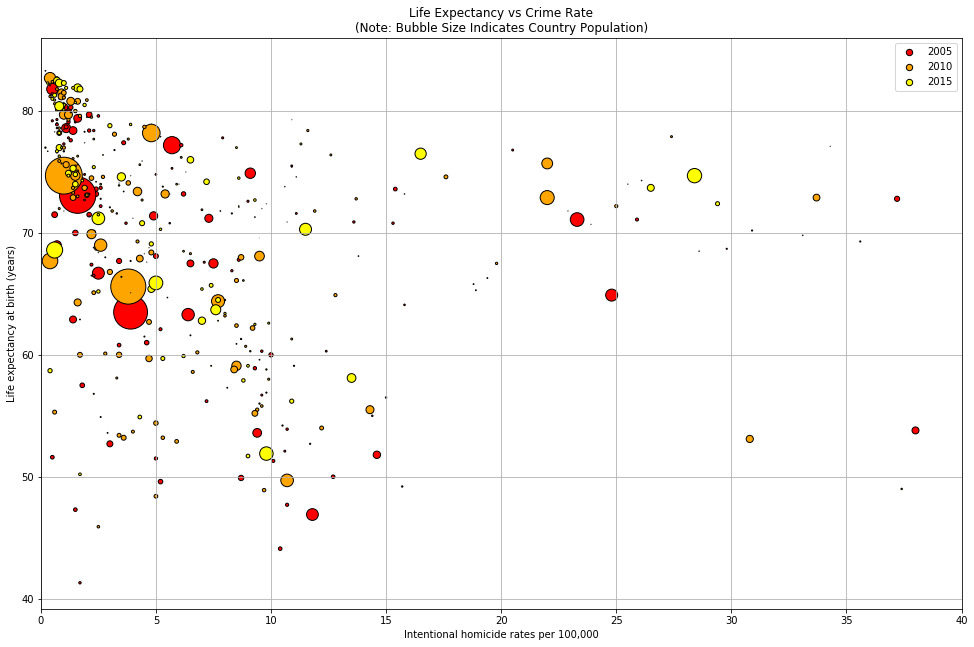

In [18]:
import matplotlib.pyplot as plt

homicides_df = crime_df[crime_df['Series'] == 'Intentional homicide rates per 100,000']
homicides_df = homicides_df.loc[:, ['Country', 'Year', 'Value']]
homicides_df.rename(columns={'Value': 'Intentional homicide rates per 100,000'}, inplace=True)
homicides_df.set_index(['Country', 'Year'], inplace=True)

life_expectancy_df = population_indicators_df[population_indicators_df['Series'] == 'Life expectancy at birth for both sexes (years)']
life_expectancy_df = life_expectancy_df.loc[:, ['Country', 'Year', 'Value']]
life_expectancy_df.rename(columns={'Value': 'Life expectancy at birth for both sexes (years)'}, inplace=True)
life_expectancy_df.set_index(['Country', 'Year'], inplace=True)

estimated_population_df = population_df[population_df['Series'] == 'Population mid-year estimates (millions)']
estimated_population_df = estimated_population_df.loc[:, ['Country', 'Year', 'Value']]
estimated_population_df.rename(columns={'Value': 'Population mid-year estimates (millions)'}, inplace=True)
estimated_population_df.set_index(['Country', 'Year'], inplace=True)

summary_df = homicides_df.join(life_expectancy_df, how='inner')
summary_df = summary_df.join(estimated_population_df, how='inner')
summary_df.reset_index(inplace=True)

fig, ax = plt.subplots()
ax.scatter(y=summary_df[summary_df['Year'] == 2005]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2005]['Intentional homicide rates per 100,000'],
           s=summary_df[summary_df['Year'] == 2005]['Population mid-year estimates (millions)'],
           color='red', marker='o', edgecolor='black', label='2005')
ax.scatter(y=summary_df[summary_df['Year'] == 2010]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2010]['Intentional homicide rates per 100,000'],
           s=summary_df[summary_df['Year'] == 2010]['Population mid-year estimates (millions)'],
           color='orange', marker='o', edgecolor='black', label='2010')
ax.scatter(y=summary_df[summary_df['Year'] == 2015]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2015]['Intentional homicide rates per 100,000'],
           s=summary_df[summary_df['Year'] == 2015]['Population mid-year estimates (millions)'],
           color='yellow', marker='o', edgecolor='black', label='2015')
ax.set_title('Life Expectancy vs Crime Rate\n(Note: Bubble Size Indicates Country Population)')
ax.set_xlabel('Intentional homicide rates per 100,000')
ax.set_ylabel('Life expectancy at birth (years)')
ax.set_xlim(0, 40)
lgnd = plt.legend(loc='upper right')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
fig.set_size_inches(16.5, 10.5)
plt.grid()

## Life Expectancy vs Assault Rates per 100,000

Let's plot Life Expectancy vs Assault Rates using a scatter plot with a bubble size set to country.

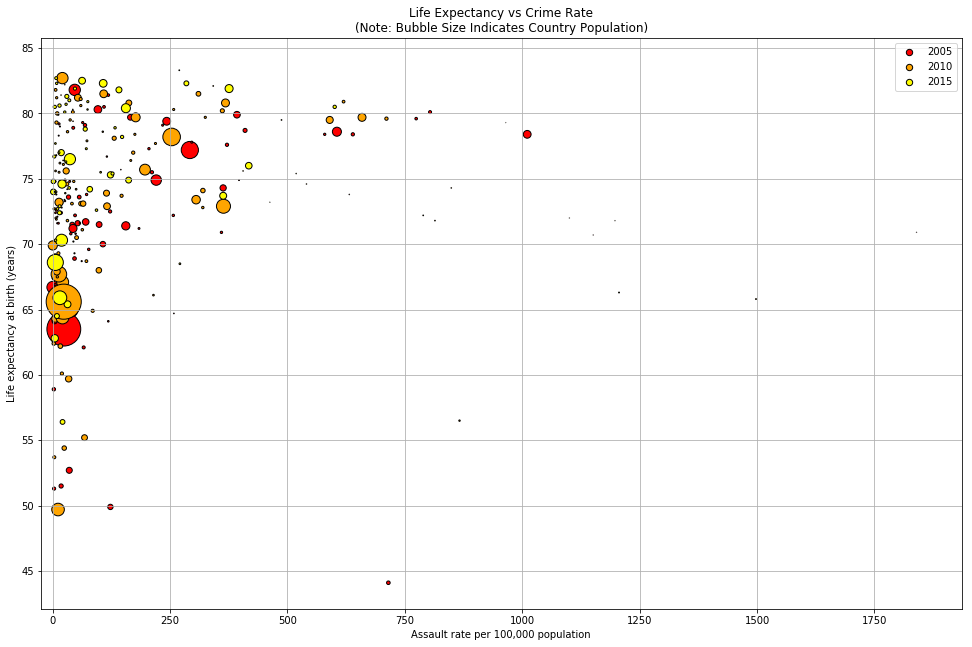

In [19]:
import matplotlib.pyplot as plt

assaults_df = crime_df[crime_df['Series'] == 'Assault rate per 100,000 population']
assaults_df = assaults_df.loc[:, ['Country', 'Year', 'Value']]
assaults_df.rename(columns={'Value': 'Assault rate per 100,000 population'}, inplace=True)
assaults_df.set_index(['Country', 'Year'], inplace=True)

life_expectancy_df = population_indicators_df[population_indicators_df['Series'] == 'Life expectancy at birth for both sexes (years)']
life_expectancy_df = life_expectancy_df.loc[:, ['Country', 'Year', 'Value']]
life_expectancy_df.rename(columns={'Value': 'Life expectancy at birth for both sexes (years)'}, inplace=True)
life_expectancy_df.set_index(['Country', 'Year'], inplace=True)

estimated_population_df = population_df[population_df['Series'] == 'Population mid-year estimates (millions)']
estimated_population_df = estimated_population_df.loc[:, ['Country', 'Year', 'Value']]
estimated_population_df.rename(columns={'Value': 'Population mid-year estimates (millions)'}, inplace=True)
estimated_population_df.set_index(['Country', 'Year'], inplace=True)

summary_df = assaults_df.join(life_expectancy_df, how='inner')
summary_df = summary_df.join(estimated_population_df, how='inner')
summary_df.reset_index(inplace=True)

fig, ax = plt.subplots()
ax.scatter(y=summary_df[summary_df['Year'] == 2005]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2005]['Assault rate per 100,000 population'],
           s=summary_df[summary_df['Year'] == 2005]['Population mid-year estimates (millions)'],
           color='red', marker='o', edgecolor='black', label='2005')
ax.scatter(y=summary_df[summary_df['Year'] == 2010]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2010]['Assault rate per 100,000 population'],
           s=summary_df[summary_df['Year'] == 2010]['Population mid-year estimates (millions)'],
           color='orange', marker='o', edgecolor='black', label='2010')
ax.scatter(y=summary_df[summary_df['Year'] == 2015]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2015]['Assault rate per 100,000 population'],
           s=summary_df[summary_df['Year'] == 2015]['Population mid-year estimates (millions)'],
           color='yellow', marker='o', edgecolor='black', label='2015')
ax.set_title('Life Expectancy vs Crime Rate\n(Note: Bubble Size Indicates Country Population)')
ax.set_xlabel('Assault rate per 100,000 population')
ax.set_ylabel('Life expectancy at birth (years)')
ax.set_xlim(-25)
lgnd = plt.legend(loc='upper right')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
fig.set_size_inches(16.5, 10.5)
plt.grid()

## Educational Attainment

In this step, we will load educational data per country from the United Nations Statistics Division (__http://data.un.org/_Docs/SYB/CSV/SYB62_T07_Education.csv__) into a pandas dataframe.

In [20]:
filename = os.path.join('Data', 'SYB62_T07_Education.csv')
education_df = pd.read_csv(filename, encoding='ISO-8859-1', skiprows=1, thousands=',')
education_df.rename(columns={'Region/Country/Area': 'Region/Country/Area ID',
                             'Unnamed: 1': 'Region/Country/Area'}, inplace=True)
education_df = education_df[498:]     
education_df.rename(columns={'Region/Country/Area ID': 'Country ID',
                              'Region/Country/Area': 'Country'}, inplace=True)
education_df.head()

,Country ID,Country,Year,Series,Value,Footnotes,Source
498,4,Afghanistan,2004,Students enrolled in secondary education (thou...,594.3060,NaN,"United Nations Educational, Scientific and Cul..."
499,4,Afghanistan,2004,Gross enrollment ratio - Secondary (male),29.4170,NaN,"United Nations Educational, Scientific and Cul..."
500,4,Afghanistan,2004,Gross enrollment ratio - Secondary (female),6.1421,NaN,"United Nations Educational, Scientific and Cul..."
501,4,Afghanistan,2004,Students enrolled in tertiary education (thous...,27.6480,NaN,"United Nations Educational, Scientific and Cul..."
502,4,Afghanistan,2004,Gross enrollment ratio - Tertiary (male),1.8601,NaN,"United Nations Educational, Scientific and Cul..."


## Life Expectancy vs Educational Attainment (Tertiary)

Let's plot Life Expectancy vs Educational Attainment using a scatter plot with a bubble size set to country.

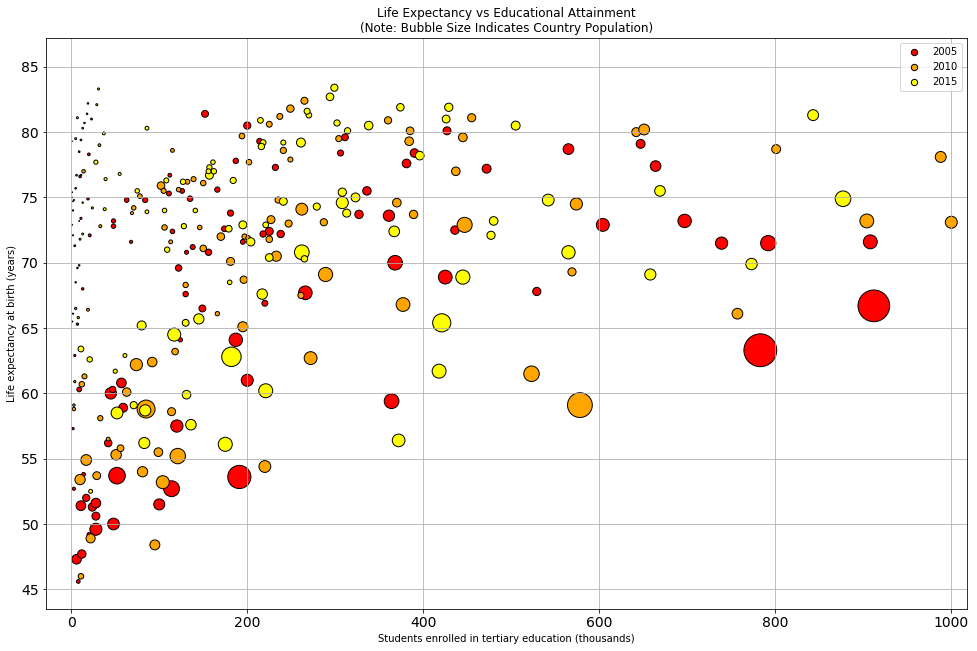

In [21]:
import numpy as np
import matplotlib.pyplot as plt

students_in_tertiary_df = education_df[education_df['Series'] == 'Students enrolled in tertiary education (thousands)']
students_in_tertiary_df = students_in_tertiary_df.loc[:, ['Country', 'Year', 'Value']]
students_in_tertiary_df.rename(columns={'Value': 'Students enrolled in tertiary education (thousands)'}, inplace=True)
students_in_tertiary_df.set_index(['Country', 'Year'], inplace=True)

life_expectancy_df = population_indicators_df[population_indicators_df['Series'] == 'Life expectancy at birth for both sexes (years)']
life_expectancy_df = life_expectancy_df.loc[:, ['Country', 'Year', 'Value']]
life_expectancy_df.rename(columns={'Value': 'Life expectancy at birth for both sexes (years)'}, inplace=True)
life_expectancy_df.set_index(['Country', 'Year'], inplace=True)

estimated_population_df = population_df[population_df['Series'] == 'Population mid-year estimates (millions)']
estimated_population_df = estimated_population_df.loc[:, ['Country', 'Year', 'Value']]
estimated_population_df.rename(columns={'Value': 'Population mid-year estimates (millions)'}, inplace=True)
estimated_population_df.set_index(['Country', 'Year'], inplace=True)

summary_df = students_in_tertiary_df.join(life_expectancy_df, how='inner')
summary_df = summary_df.join(estimated_population_df, how='inner')
summary_df.reset_index(inplace=True)
summary_df['Students enrolled in tertiary education (thousands)'] = summary_df['Students enrolled in tertiary education (thousands)'].transform(lambda x: x.replace(',', '')).apply(pd.to_numeric).map("{:.0f}".format)


min_x = int(summary_df.sort_values("Students enrolled in tertiary education (thousands)").iloc[0]["Students enrolled in tertiary education (thousands)"])
max_x = int(summary_df.sort_values("Students enrolled in tertiary education (thousands)").iloc[-2]["Students enrolled in tertiary education (thousands)"])


fig, ax = plt.subplots()

ax.scatter(y=summary_df[summary_df['Year'] == 2005]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2005]['Students enrolled in tertiary education (thousands)'].apply(pd.to_numeric),
           s=summary_df[summary_df['Year'] == 2005]['Population mid-year estimates (millions)']*7,
           color='red', marker='o', edgecolor='black', label='2005')
ax.scatter(y=summary_df[summary_df['Year'] == 2010]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2010]['Students enrolled in tertiary education (thousands)'].apply(pd.to_numeric),
           s=summary_df[summary_df['Year'] == 2010]['Population mid-year estimates (millions)']*7,
           color='orange', marker='o', edgecolor='black', label='2010')
ax.scatter(y=summary_df[summary_df['Year'] == 2015]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2015]['Students enrolled in tertiary education (thousands)'].apply(pd.to_numeric),
           s=summary_df[summary_df['Year'] == 2015]['Population mid-year estimates (millions)']*7,
           color='yellow', marker='o', edgecolor='black', label='2015')

ax.set_title('Life Expectancy vs Educational Attainment\n(Note: Bubble Size Indicates Country Population)')
ax.set_xlabel('Students enrolled in tertiary education (thousands)')
ax.set_ylabel('Life expectancy at birth (years)')

ax.tick_params(labelsize=14)

ax.set_xlim((min_x - 0.03*(max_x - min_x)), 
            (max_x + 0.03*(max_x - min_x)))

lgnd = plt.legend(loc='upper right')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
fig.set_size_inches(16.5, 10.5)
plt.grid()

In [25]:
filename = os.path.join('Data', 'SYB62_T11_Expenditure on Health.csv')
health_df = pd.read_csv(filename, encoding='ISO-8859-1', skiprows=1)
health_df.rename(columns={'Region/Country/Area': 'Region/Country/Area ID',
                             'Unnamed: 1': 'Region/Country/Area'}, inplace=True)
health_df.rename(columns={'Region/Country/Area ID': 'Country ID',
                         'Region/Country/Area': 'Country'}, inplace=True)
health_df.head(5)

,Country ID,Country,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9483,NaN,"World Health Organization (WHO), Geneva, WHO G..."
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.5697,NaN,"World Health Organization (WHO), Geneva, WHO G..."
2,4,Afghanistan,2014,Current health expenditure (% of GDP),9.5289,NaN,"World Health Organization (WHO), Geneva, WHO G..."
3,4,Afghanistan,2015,Current health expenditure (% of GDP),10.0940,NaN,"World Health Organization (WHO), Geneva, WHO G..."
4,4,Afghanistan,2016,Current health expenditure (% of GDP),10.1987,NaN,"World Health Organization (WHO), Geneva, WHO G..."


In [26]:
gdpfilename = os.path.join('Data', 'SYB62_T13_201904_GDP_and_GDP_Per_Capita.csv')
gdp_df = pd.read_csv(gdpfilename, encoding='ISO-8859-1', skiprows=1)
gdp_df.rename(columns={'Region/Country/Area': 'Region/Country/Area ID',
                             'Unnamed: 1': 'Region/Country/Area'}, inplace=True)
gdp_df = gdp_df[839:]      # remove data per region and just keep data per country
gdp_df.rename(columns={'Region/Country/Area ID': 'Country ID',
                         'Region/Country/Area': 'Country'}, inplace=True)
gdp_df.head()

,Country ID,Country,Year,Series,Value,Footnotes,Source
839,4,Afghanistan,2010,GDP in current prices (millions of US dollars),"16,078",NaN,"United Nations Statistics Division, New York, ..."
840,4,Afghanistan,2015,GDP in current prices (millions of US dollars),"20,608",NaN,"United Nations Statistics Division, New York, ..."
841,4,Afghanistan,2016,GDP in current prices (millions of US dollars),"20,235",NaN,"United Nations Statistics Division, New York, ..."
842,4,Afghanistan,2017,GDP in current prices (millions of US dollars),"21,993",NaN,"United Nations Statistics Division, New York, ..."
843,4,Afghanistan,1985,GDP per capita (US dollars),282,NaN,"United Nations Statistics Division, New York, ..."


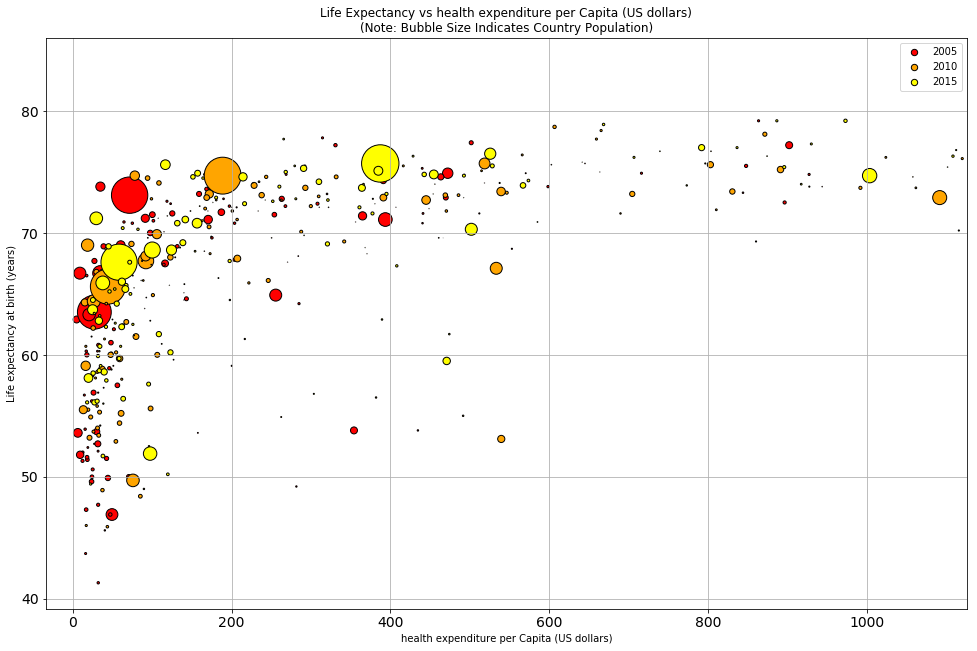

In [27]:
import numpy as np
import matplotlib.pyplot as plt

health_gdp_df = health_df[health_df['Series'] == 'Current health expenditure (% of GDP)']
health_gdp_df = health_gdp_df.loc[:, ['Country', 'Year', 'Value']]
health_gdp_df.rename(columns={'Value': 'health expenditure (% of GDP)'}, inplace=True)
health_gdp_df.set_index(['Country', 'Year'], inplace=True)

gdp_percapita_df = gdp_df[gdp_df['Series'] == 'GDP per capita (US dollars)']
gdp_percapita_df = gdp_percapita_df.loc[:, ['Country', 'Year', 'Value']]
gdp_percapita_df.rename(columns={'Value': 'GDP per capita (US dollars)'}, inplace=True)
gdp_percapita_df.set_index(['Country', 'Year'], inplace=True)

summary_df = health_gdp_df.join(life_expectancy_df, how='inner')
summary_df = summary_df.join(estimated_population_df, how='inner')
summary_df = summary_df.join(gdp_percapita_df, how='inner')
summary_df.reset_index(inplace=True)
summary_df['health expenditure (% of GDP)'] = summary_df['health expenditure (% of GDP)'].transform(lambda x: x.replace(',', '')).apply(float)
summary_df['GDP per capita (US dollars)'] = summary_df['GDP per capita (US dollars)'].transform(lambda x: x.replace(',', '')).apply(float)

summary_df['health expenditure per Capita (US dollars)'] = summary_df['health expenditure (% of GDP)']*summary_df['GDP per capita (US dollars)'] / 100

summary_df['health expenditure per Capita (US dollars)'] = summary_df['health expenditure per Capita (US dollars)'].map("{:.1f}".format)


min_x = float(summary_df["health expenditure per Capita (US dollars)"].min())
max_x = float(summary_df["health expenditure per Capita (US dollars)"].max())


fig, ax = plt.subplots()

ax.scatter(y=summary_df[summary_df['Year'] == 2005]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2005]['health expenditure per Capita (US dollars)'].apply(pd.to_numeric),
           s=summary_df[summary_df['Year'] == 2005]['Population mid-year estimates (millions)'],
           color='red', marker='o', edgecolor='black', label='2005')
ax.scatter(y=summary_df[summary_df['Year'] == 2010]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2010]['health expenditure per Capita (US dollars)'].apply(pd.to_numeric),
           s=summary_df[summary_df['Year'] == 2010]['Population mid-year estimates (millions)'],
           color='orange', marker='o', edgecolor='black', label='2010')
ax.scatter(y=summary_df[summary_df['Year'] == 2015]['Life expectancy at birth for both sexes (years)'],
           x=summary_df[summary_df['Year'] == 2015]['health expenditure per Capita (US dollars)'].apply(pd.to_numeric),
           s=summary_df[summary_df['Year'] == 2015]['Population mid-year estimates (millions)'],
           color='yellow', marker='o', edgecolor='black', label='2015')

ax.set_title('Life Expectancy vs health expenditure per Capita (US dollars)\n(Note: Bubble Size Indicates Country Population)')
ax.set_xlabel('health expenditure per Capita (US dollars)')
ax.set_ylabel('Life expectancy at birth (years)')


ax.tick_params(labelsize=14)

ax.set_xlim((min_x - 0.15*(max_x - min_x)), 
            (max_x + 0.15*(max_x - min_x)))

lgnd = plt.legend(loc='upper right')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
fig.set_size_inches(16.5, 10.5)
plt.grid()            